# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [35]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("All Done")

All Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [36]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = (len(X_train))

# TODO: Number of validation examples
n_validation = (len(X_valid))

# TODO: Number of testing examples.
n_test = (len(X_test))

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.

n_classes = len(np.unique(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

17


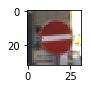

In [37]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


index = random.randint(0, len(X_train))

#index = 17999
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [38]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


In [39]:
# affine Image Augmentation Fucntion Block
#Code thanks to vxy10 via ImageAugmentation - Github: https://github.com/vxy10/ImageAugmentation

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

In [40]:
# Normalize number of images from each catagory using affined images

import math


#create a histrogram of training images by category
histolist = np.zeros(43) 
for i in range(len(y_train)):
    histolist[y_train[i]]+=1


#add the affined images to our training data
new_size = math.ceil(n_train*5/43)
eX_train = []
ey_train = []
for i in range(len(X_train)):
    occurance_rate = histolist[y_train[i]]
    eX_train.append(X_train[i])
    ey_train.append(y_train[i])
    num_jitters =(math.ceil((new_size - occurance_rate)/occurance_rate))
    for _ in range(num_jitters):
        jitter = transform_image(X_train[i],20,10,5,brightness=1)
        eX_train.append(jitter)
        ey_train.append(y_train[i])
eX_train = np.array(eX_train)
ey_train = np.array(ey_train)


In [41]:
#Shuffle our data
from sklearn.utils import shuffle
X_train, y_train = shuffle(eX_train, ey_train)


# Convert to Grayscale and Normalize
from sklearn import preprocessing
tempList = []


for i in range(len(X_train)):
    temp = np.array(cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY))
    temp = preprocessing.scale(temp).reshape(32,32,1)
    #print (temp.mean(axis=0))
    #X_train = np.array(cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)).reshape(32,32,1)
    #X_train[i] = temp          
    tempList.append(temp)
tempList = np.array(tempList)
X_train = tempList
tempList = []

for i in range(len(X_valid)):
    temp = np.array(cv2.cvtColor(X_valid[i], cv2.COLOR_RGB2GRAY))
    temp = preprocessing.scale(temp).reshape(32,32,1)
    #X_train = np.array(cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)).reshape(32,32,1)
    #X_train[i] = temp          
    tempList.append(temp)
tempList = np.array(tempList)
X_valid = tempList
tempList = []

for i in range(len(X_test)):
    temp = np.array(cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY))
    temp = preprocessing.scale(temp).reshape(32,32,1)
    #X_train = np.array(cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)).reshape(32,32,1)
    #X_train[i] = temp          
    tempList.append(temp)
tempList = np.array(tempList)
X_test = tempList    
    

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

learning_rate = 0.001

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x): 
    
    mu = 0
    sigma = 0.1
    #dropout = 0.65

    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding = 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)       

    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    fc0 = flatten(conv2) #32 -> 28 -> 24*24*32 = 62208
    
    #Fully Connected Layer 1 Input: 1280 Output: 400
    fc1_W = tf.Variable(tf.truncated_normal(shape=(18432, 100), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(100))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b    
   
    #Fully Connected Layer 1 Input: 1280 Output: 400
    fc2_W = tf.Variable(tf.truncated_normal(shape=(100, 100), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(100))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
        
    #Fully Connected Layer 1 Input: 1280 Output: 400
    fc3_W = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


#Placeholder for inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [12]:
print(X_train[0].shape)

(32, 32, 1)


In [13]:

#Trigger the tensorflow opperation pipeline

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)


In [14]:

#Test Accuracy Function

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy+=(accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:

#Train Model

from time import time

with tf.Session() as sess:
    
    t0 = time()
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    
    saver.save(sess, './lenet')
    
    print ("training time:", round(time()-t0, 3), "s")
    print ("Learning rate was:", learning_rate)
    print ("Model Saved")
        

Training...

EPOCH 1 ...
Validation Accuracy = 0.893

EPOCH 2 ...
Validation Accuracy = 0.915

EPOCH 3 ...
Validation Accuracy = 0.932

EPOCH 4 ...
Validation Accuracy = 0.925

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.917

EPOCH 7 ...
Validation Accuracy = 0.919

EPOCH 8 ...
Validation Accuracy = 0.923

EPOCH 9 ...
Validation Accuracy = 0.934

EPOCH 10 ...
Validation Accuracy = 0.943

training time: 5530.911 s
Learning rate was: 0.001
Model Saved


In [16]:
from time import time

with tf.Session() as sess:
    
    t0 = time()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(X_test, y_test)
    print("Test Image Accuracy = %.1f%% " %(accuracy*100))
    print ("Testing time:", round(time()-t0, 3), "s")
    
    t0 = time()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(X_valid, y_valid)
    print("Test Image Accuracy = %.1f%% " %(accuracy*100))
    print ("Validation set time:", round(time()-t0, 3), "s")
    
    
    t0 = time()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(X_train, y_train)
    print("Test Image Accuracy = %.1f%% " %(accuracy*100))
    print ("Training set testing time:", round(time()-t0, 3), "s")
        

Test Image Accuracy = 90.9% 
Testing time: 11.939 s
Test Image Accuracy = 94.3% 
Validation set time: 4.065 s
Test Image Accuracy = 88.6% 
Training set testing time: 179.445 s


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#Load and preprocess image data

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy as sp
from scipy import misc
from PIL import Image
import cv2
from sklearn import preprocessing

image_list = []


image = mpimg.imread('TrafficSigns/Speed_limit_70km.png')
image = image[60:310, 400:675]
image = sp.misc.imresize(image, (32,32,3), interp='bilinear')
image = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
image = preprocessing.scale(image).reshape(32,32,1)       
image_list.append(image)

    

image = mpimg.imread('TrafficSigns/General_caution.jpg')
image = sp.misc.imresize(image, (32,32,3), interp='bilinear')
image = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
image = preprocessing.scale(image).reshape(32,32,1)  
image_list.append(image)


image = mpimg.imread('TrafficSigns/Priority_road.jpg')
#image = image[60:310, 400:675]
image = sp.misc.imresize(image, (32,32,3), interp='bilinear')
image = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
image = preprocessing.scale(image).reshape(32,32,1)  
image_list.append(image)



image = mpimg.imread('TrafficSigns/Speed_limit_60km.jpg')
#image = image[60:310, 400:675]
image = sp.misc.imresize(image, (32,32,3), interp='bilinear')
image = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
image = preprocessing.scale(image).reshape(32,32,1)  
image_list.append(image)



image = mpimg.imread('TrafficSigns/Stop.jpg')
image = image[40:160, 65:170]
image = sp.misc.imresize(image, (32,32,3), interp='bilinear')
image = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
image = preprocessing.scale(image).reshape(32,32,1)  
image_list.append(image)


### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


predict = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    stuff = sess.run(logits, feed_dict={x: image_list})
    list = tf.argmax(stuff, 1)
    print (list.eval(feed_dict={x: image_list}))


[ 7 18 12  5 14]


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [20]:
correct_images_list = [4, 18, 12, 3, 14]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(image_list, correct_images_list)
    print("New Image Accuracy = %.1f%% " %(accuracy*100))
            

New Image Accuracy = 60.0% 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    stuff = sess.run(logits, feed_dict={x: image_list})
    softmax = tf.nn.softmax(stuff)
    #new_stuff = sess.run(tf.nn.top_k(tf.constant(softmax), k=5))
    new_stuff = sess.run(tf.nn.top_k(softmax, k=5))


In [31]:
print(new_stuff)

TopKV2(values=array([[  8.28044295e-01,   1.71916842e-01,   3.88777371e-05,
          1.40730566e-10,   1.35001774e-10],
       [  1.00000000e+00,   1.71509486e-12,   2.75213066e-14,
          3.56514738e-16,   2.32036001e-19],
       [  9.99997258e-01,   2.53146118e-06,   1.96150324e-07,
          5.82162166e-11,   2.36557770e-11],
       [  9.46981013e-01,   1.47838974e-02,   1.30275469e-02,
          1.20599847e-02,   4.95168287e-03],
       [  7.94140756e-01,   2.05805272e-01,   3.22144697e-05,
          1.94484528e-05,   2.10475582e-06]], dtype=float32), indices=array([[ 7,  4, 34,  8,  1],
       [18, 26, 27, 24, 11],
       [12, 40, 35,  3, 38],
       [ 5,  7,  1,  8,  0],
       [14, 12, 38, 33, 35]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.